<a href="https://colab.research.google.com/github/sirius70/NLP_HW4/blob/main/IE7275_Quiz5_Fall2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IE7275: Data Mining in Engineering
## Quiz 5 – Fall 2025 (Full Version)

This quiz contains **20 questions**, covering advanced topics from Modules 4 and 5.  

Topics include:  
- Association rule mining, visualization, and recommendation systems  
- Collaborative filtering (user-based, item-based, hybrid approaches)  
- Classification basics, evaluation metrics, class imbalance handling  
- Baseline models, rule-based classifiers, and k-NN (with distance metrics, tuning, cross-validation)  

---

**Instructions:**  
- Answer all questions in Python.  
- Show outputs clearly (tables/plots where requested).  
- Submit your completed notebook as a PDF on Canvas.  
- Time allowed: 120 minutes.  


### Dataset 1: Transactional + User-Item Dataset (for Q1–Q10)
Generate the dataset:

In [6]:
import warnings
warnings.filterwarnings(
    "ignore",
    message="datetime.datetime.utcnow\\(\\) is deprecated"
)

In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)

users = [f"U{i}" for i in range(1,2001)]

categories = {
    "Groceries": ["milk","bread","butter","eggs","cheese","cereal"],
    "Electronics": ["laptop","mouse","keyboard","monitor","phone","charger"],
    "Clothing": ["shirt","pants","shoes","socks","jacket","hat"]
}

transactions = []
for u in users:
    for _ in range(np.random.randint(10,20)):   # more baskets per user
        basket = []
        # Category bias
        cat = np.random.choice(list(categories.keys()), p=[0.5,0.3,0.2])
        basket.extend(np.random.choice(categories[cat], size=np.random.randint(3,5), replace=False))
        # Enforce strong pairs
        if cat == "Groceries" and np.random.rand() < 0.7:
            basket.append("milk"); basket.append("bread")
        if cat == "Electronics" and np.random.rand() < 0.6:
            basket.append("laptop"); basket.append("mouse")
        if cat == "Clothing" and np.random.rand() < 0.5:
            basket.append("shirt"); basket.append("pants")
        transactions.append((u, list(set(basket))))

df1 = pd.DataFrame(transactions, columns=["User","Items"])
print("Transactions:", len(df1))
df1.head()


Transactions: 29018


,User,Items
0,U1,"[charger, monitor, mouse, laptop]"
1,U1,"[bread, cereal, milk, butter]"
2,U1,"[laptop, phone, keyboard, monitor, mouse]"
3,U1,"[laptop, phone, keyboard, monitor, mouse]"
4,U1,"[bread, cheese, milk, eggs]"


**Q1.**  
Convert the dataset into a binary transaction matrix suitable for frequent itemset mining.

In [3]:
# Add transaction ID
df1["TransactionID"] = df1.index

# Explode items
df_exploded = df1.explode("Items")

# Create binary transaction matrix
binary_matrix = pd.crosstab(df_exploded["TransactionID"], df_exploded["Items"])

# Ensure 0/1 format
binary_matrix = binary_matrix.astype(int)

binary_matrix.head()


Items,bread,butter,cereal,charger,cheese,eggs,hat,jacket,keyboard,laptop,milk,monitor,mouse,pants,phone,shirt,shoes,socks
TransactionID,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


**Q2.**  
Mine frequent itemsets using Apriori with minimum support of 0.01. Display the top results.

In [7]:
from mlxtend.frequent_patterns import apriori

# Mine frequent itemsets with minimum support = 1%
frequent_itemsets = apriori(binary_matrix,
                            min_support=0.01,
                            use_colnames=True)

# Sort by support (highest first)
frequent_itemsets = frequent_itemsets.sort_values(
    by="support",
    ascending=False
)

# Show top results
frequent_itemsets.head(10)


/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.439865,(bread)
10,0.439658,(milk)
22,0.397098,"(bread, milk)"
2,0.295782,(cereal)
1,0.295782,(butter)
5,0.295403,(eggs)
4,0.293645,(cheese)
19,0.253463,"(bread, cereal)"
29,0.252050,"(cereal, milk)"
26,0.252016,"(butter, milk)"


**Q3.**  
Generate association rules from the mined itemsets with minimum confidence of 0.5. Show support, confidence, and lift for the strongest rules.

In [8]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules with minimum confidence = 0.5
rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=0.5)

# Select and sort the strongest rules by lift
strong_rules = rules[["antecedents", "consequents", "support", "confidence", "lift"]] \
                .sort_values(by="lift", ascending=False)

# Show top rules
strong_rules.head(10)


,antecedents,consequents,support,confidence,lift
72,(shirt),(pants),0.129437,0.822062,5.246225
73,(pants),(shirt),0.129437,0.826039,5.246225
305,"(jacket, shirt, hat, shoes)",(pants),0.012820,0.817582,5.217639
161,"(shirt, hat)",(pants),0.071852,0.816047,5.207841
182,"(pants, shoes)",(shirt),0.069853,0.812099,5.157693
162,"(pants, hat)",(shirt),0.071852,0.808453,5.134534
165,"(jacket, pants)",(shirt),0.071645,0.807692,5.129704
173,"(pants, socks)",(shirt),0.070715,0.807556,5.128838
181,"(shirt, shoes)",(pants),0.069853,0.803409,5.127185
320,"(pants, hat, socks, shoes)",(shirt),0.011372,0.806846,5.124328


**Q4.**  
Visualize the association rules using a network graph (items as nodes, rules as edges).

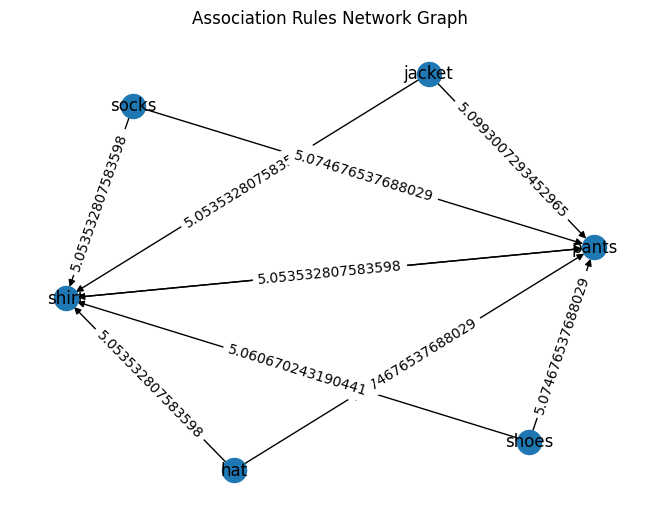

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges from association rules
for _, row in strong_rules.head(20).iterrows():  # limit to top 20 rules for clarity
    for antecedent in row["antecedents"]:
        for consequent in row["consequents"]:
            G.add_edge(
                antecedent,
                consequent,
                weight=row["lift"]
            )

# Draw the graph
plt.figure()
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Rules Network Graph")
plt.show()


**Q5.**  
Create a heatmap of support, confidence, and lift values for the top 20 strongest rules.

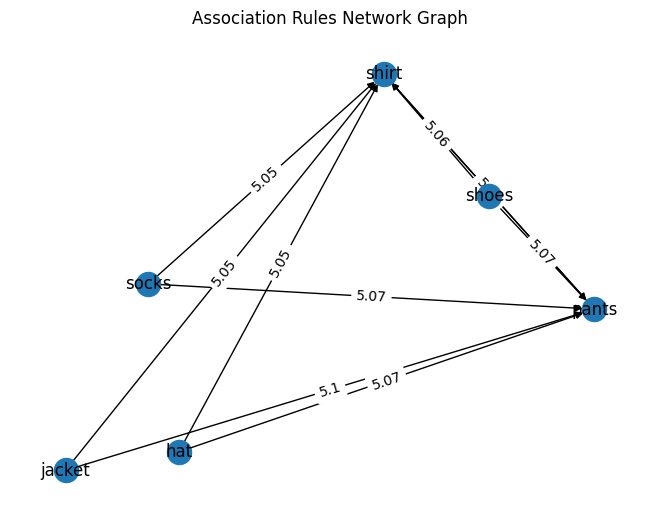

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges using top association rules
top_rules = strong_rules.head(20)

for _, row in top_rules.iterrows():
    antecedents = list(row["antecedents"])
    consequents = list(row["consequents"])
    lift = row["lift"]

    for a in antecedents:
        for c in consequents:
            G.add_edge(a, c, weight=round(lift, 2))

# Plot the network graph
plt.figure()

pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True)

# Show lift values on edges
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Rules Network Graph")
plt.show()


**Q6.**  
Group items into categories (Groceries, Electronics, Clothing) and mine category-level rules using Apriori. Display frequent category itemsets.

In [11]:
from mlxtend.frequent_patterns import apriori

# Define category mapping
category_map = {
    "milk":"Groceries","bread":"Groceries","butter":"Groceries",
    "eggs":"Groceries","cheese":"Groceries","cereal":"Groceries",
    "laptop":"Electronics","mouse":"Electronics","keyboard":"Electronics",
    "monitor":"Electronics","phone":"Electronics","charger":"Electronics",
    "shirt":"Clothing","pants":"Clothing","shoes":"Clothing",
    "socks":"Clothing","jacket":"Clothing","hat":"Clothing"
}

# Convert each transaction's items to categories
df1["Categories"] = df1["Items"].apply(
    lambda items: list(set([category_map[item] for item in items]))
)

# Create transaction-category matrix
df_cat_exploded = df1.explode("Categories")

category_matrix = pd.crosstab(
    df_cat_exploded["TransactionID"],
    df_cat_exploded["Categories"]
).astype(int)

# Mine frequent category-level itemsets
freq_category_itemsets = apriori(category_matrix,
                                 min_support=0.01,
                                 use_colnames=True)

# Sort by support
freq_category_itemsets = freq_category_itemsets.sort_values(
    by="support",
    ascending=False
)

freq_category_itemsets.head(10)


/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
2,0.503722,(Groceries)
1,0.299159,(Electronics)
0,0.197119,(Clothing)


**Q7.**  
Add contextual attributes such as “time of day” or “user type” to the transactions. Mine multidimensional rules and compare with original rules.

In [12]:
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import pandas as pd

# Add contextual attributes
np.random.seed(42)

# Assign random time of day and user type to each transaction
df1["TimeOfDay"] = np.random.choice(
    ["Morning", "Afternoon", "Evening"],
    size=len(df1),
    p=[0.3, 0.4, 0.3]
)

df1["UserType"] = np.random.choice(
    ["Regular", "Premium"],
    size=len(df1),
    p=[0.7, 0.3]
)

# Combine original items with context into one list per transaction
df1["MultiItems"] = df1.apply(
    lambda row: row["Items"] + [row["TimeOfDay"], row["UserType"]],
    axis=1
)

# Create binary multidimensional matrix
df_multi = df1.explode("MultiItems")

multi_matrix = pd.crosstab(
    df_multi["TransactionID"],
    df_multi["MultiItems"]
).astype(int)

# Mine multidimensional frequent itemsets
freq_multi = apriori(
    multi_matrix,
    min_support=0.01,
    use_colnames=True
)

# Generate association rules with confidence >= 0.5
rules_multi = association_rules(
    freq_multi,
    metric="confidence",
    min_threshold=0.5
)

# Sort by lift for strongest rules
rules_multi = rules_multi.sort_values(
    by="lift",
    ascending=False
)

# Display top 10 multidimensional rules
rules_multi[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)


/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
3129,"(pants, Morning, socks)","(shirt, Regular)",0.015749,0.607713,5.493648
1643,"(Morning, pants, Regular)",(shirt),0.028327,0.853583,5.421155
2823,"(shirt, Evening, shoes)","(pants, Regular)",0.015232,0.592493,5.396413
3069,"(jacket, Regular, pants, Morning)",(shirt),0.015714,0.849162,5.393080
3128,"(shirt, Morning, socks)","(pants, Regular)",0.015749,0.590439,5.377705
1646,"(pants, Morning)","(shirt, Regular)",0.028327,0.594790,5.376829
412,"(pants, Morning)",(shirt),0.040285,0.845876,5.372208
849,"(shirt, Afternoon, Premium)",(pants),0.015680,0.841035,5.367310
2403,"(shirt, hat, Afternoon)","(pants, Regular)",0.020436,0.588878,5.363483
3120,"(Regular, pants, Morning, shoes)",(shirt),0.014853,0.840156,5.335882


**Q8.**  
Filter rules to only include those where the antecedent contains 'milk'. Rank by lift.

In [13]:
# Filter rules where antecedent contains 'milk'
milk_rules = rules_multi[rules_multi["antecedents"].apply(lambda x: "milk" in x)]

# Sort filtered rules by lift (highest first)
milk_rules = milk_rules.sort_values(by="lift", ascending=False)

# Display top results
milk_rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)


,antecedents,consequents,support,confidence,lift
3939,"(cereal, cheese, eggs, butter, milk)",(bread),0.011682,1.000000,2.273425
3769,"(butter, cereal, Morning, milk)","(bread, Regular)",0.023640,0.657088,2.124263
2676,"(Regular, milk, Evening)","(bread, cereal)",0.048694,0.533006,2.102893
2961,"(butter, Morning, milk)","(bread, Regular)",0.047901,0.650445,2.102785
2916,"(Morning, milk, Premium)","(bread, cheese)",0.019712,0.521898,2.094086
3969,"(cereal, cheese, butter, milk, Evening)","(bread, Regular)",0.010511,0.647558,2.093455
1363,"(milk, Evening)","(bread, cereal)",0.069922,0.530458,2.092837
2977,"(cereal, Morning, milk)","(bread, Regular)",0.047040,0.646613,2.090398
3745,"(cereal, eggs, butter, milk, Evening)",(bread),0.014474,0.919037,2.089362
2587,"(milk, Evening, Premium)","(bread, butter)",0.021263,0.525554,2.086254


**Q9.**  
Implement a simple recommendation system using the mined rules. Given a user’s basket (e.g., ['milk','bread']), recommend 3–5 items not yet purchased.

In [14]:
# Function to recommend items based on association rules
def recommend_items(basket, rules_df, max_recs=5):
    recommendations = set()
    for _, row in rules_df.iterrows():
        antecedent = set(row["antecedents"])
        consequent = set(row["consequents"])
        # Recommend consequents if antecedent is in basket
        if antecedent.issubset(basket):
            recommendations.update(consequent - set(basket))
        if len(recommendations) >= max_recs:
            break
    return list(recommendations)[:max_recs]

# Example
user_basket = ['milk', 'bread']
recommended_items = recommend_items(user_basket, rules_multi, max_recs=5)

print("User basket:", user_basket)
print("Recommended items:", recommended_items)


User basket: ['milk', 'bread']
Recommended items: [np.str_('butter'), np.str_('cereal'), np.str_('cheese'), np.str_('eggs'), 'Regular']


**Q10.**  
Extend the recommender by combining association-rule recommendations with collaborative filtering. Compare outputs of both methods.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Prepare user-item matrix for collaborative filtering
users = df1["User"].unique()
items = list(binary_matrix.columns)
user_item_matrix = pd.DataFrame(0, index=users, columns=items)

for _, row in df1.iterrows():
    user_item_matrix.loc[row["User"], row["Items"]] = 1

# 2. Compute user-user similarity
user_similarity = pd.DataFrame(
    cosine_similarity(user_item_matrix),
    index=users,
    columns=users
)

# 3. User-based collaborative filtering function
def cf_recommend(user_id, user_item_matrix, user_similarity, max_recs=5):
    # Weighted sum of other users' baskets
    sim_scores = user_similarity[user_id]
    weighted_sum = user_item_matrix.T.dot(sim_scores)
    # Remove items the user already has
    already_has = user_item_matrix.loc[user_id]
    weighted_sum = weighted_sum[already_has == 0]
    return weighted_sum.sort_values(ascending=False).head(max_recs).index.tolist()

# 4. Combine with association-rule recommendations
def hybrid_recommend(user_basket, user_id, rules_df, user_item_matrix, user_similarity, max_recs=5):
    rule_recs = recommend_items(user_basket, rules_df, max_recs)
    cf_recs = cf_recommend(user_id, user_item_matrix, user_similarity, max_recs)
    # Combine, keeping unique items
    combined = list(dict.fromkeys(rule_recs + cf_recs))
    return combined[:max_recs]

# 5. Example
example_user = 'U1'
example_basket = ['milk', 'bread']

rule_only = recommend_items(example_basket, rules_multi, max_recs=5)
cf_only = cf_recommend(example_user, user_item_matrix, user_similarity, max_recs=5)
hybrid = hybrid_recommend(example_basket, example_user, rules_multi, user_item_matrix, user_similarity, max_recs=5)

print("Rule-based recommendations:", rule_only)
print("Collaborative filtering recommendations:", cf_only)
print("Hybrid recommendations:", hybrid)


Rule-based recommendations: [np.str_('butter'), np.str_('cereal'), np.str_('cheese'), np.str_('eggs'), 'Regular']
Collaborative filtering recommendations: [np.str_('shirt'), np.str_('pants'), np.str_('socks')]
Hybrid recommendations: [np.str_('butter'), np.str_('cereal'), np.str_('cheese'), np.str_('eggs'), 'Regular']


### Dataset 2: Complex Labeled Dataset for Classification (for Q11–Q20)
Generate the dataset:

In [16]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=12, n_informative=6, n_redundant=2,
                           n_classes=3, weights=[0.6,0.3,0.1], flip_y=0.05, random_state=42)
df2 = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1,13)])
df2['Target'] = y
df2.head()


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Target
0,1.471035,0.364021,1.483402,-0.886496,0.783459,-1.037066,-0.699495,0.665369,1.123303,0.553560,0.976001,-1.153692,0
1,-0.393053,0.574600,-2.232989,0.438435,-1.447026,1.393455,1.001632,0.710549,0.961696,-1.182653,0.529660,-1.241624,1
2,-0.368939,-0.178394,-0.009404,-0.406505,-2.591398,-0.917976,0.213809,1.731170,-2.344809,1.730069,0.278864,-0.961268,2
3,0.381310,1.131593,-1.345018,0.566874,-1.145745,-1.518911,0.311653,-2.630730,-0.286155,-1.220692,-2.331940,-1.897649,2
4,-0.138512,-0.058333,-2.167894,-1.684293,-1.379997,-0.305189,-0.423890,1.046912,-0.742977,-0.285153,-1.935820,2.074664,1


**Q11.**  
Inspect class distribution in the dataset. Visualize it using a bar plot.

Class distribution:
 Target
0    293
1    153
2     54
Name: count, dtype: int64


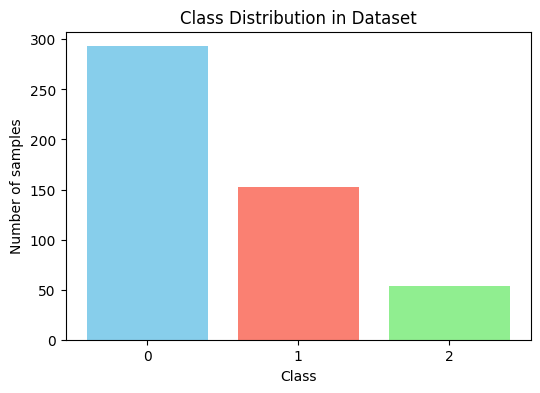

In [17]:
import matplotlib.pyplot as plt

# Check class distribution
class_counts = df2['Target'].value_counts().sort_index()
print("Class distribution:\n", class_counts)

# Bar plot
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue','salmon','lightgreen'])
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution in Dataset")
plt.xticks(class_counts.index)
plt.show()


**Q12.**  
Split the dataset into training and test sets. Use stratification to preserve class distribution.

In [18]:
from sklearn.model_selection import train_test_split

# Features and target
X = df2.drop('Target', axis=1)
y = df2['Target']

# Split into train and test (80-20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train class distribution:\n", y_train.value_counts())
print("y_test class distribution:\n", y_test.value_counts())


X_train: (400, 12) X_test: (100, 12)
y_train class distribution:
 Target
0    234
1    123
2     43
Name: count, dtype: int64
y_test class distribution:
 Target
0    59
1    30
2    11
Name: count, dtype: int64


**Q13.**  
Train a logistic regression model. Evaluate it using accuracy, precision, recall, and F1-score. Display a classification report.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression (multiclass)
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report:\n")
print(report)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        59
           1       0.59      0.53      0.56        30
           2       0.25      0.09      0.13        11

    accuracy                           0.70       100
   macro avg       0.54      0.51      0.51       100
weighted avg       0.66      0.70      0.67       100



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(


**Q14.**  
Create and evaluate a baseline classifier that always predicts the majority class. Compare results with logistic regression.

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Majority class baseline
baseline = DummyClassifier(strategy='most_frequent', random_state=42)

# Train on training set
baseline.fit(X_train, y_train)

# Predict on test set
y_pred_baseline = baseline.predict(X_test)

# Classification report
report_baseline = classification_report(y_test, y_pred_baseline)
print("Baseline (Majority Class) Classification Report:\n")
print(report_baseline)


Baseline (Majority Class) Classification Report:

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        59
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        11

    accuracy                           0.59       100
   macro avg       0.20      0.33      0.25       100
weighted avg       0.35      0.59      0.44       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Q15.**  
Define a simple rule-based classifier using thresholds on 2–3 features. Compare its performance with the baseline.

In [21]:
from sklearn.metrics import classification_report
import numpy as np

# Define a simple rule-based classifier
def rule_based_classifier(X):
    y_pred = []
    for _, row in X.iterrows():
        # Example rules using 3 features
        if row['Feature1'] > 0.5 and row['Feature2'] > 0:
            y_pred.append(0)
        elif row['Feature3'] < -1:
            y_pred.append(2)
        else:
            y_pred.append(1)
    return np.array(y_pred)

# Predict on test set
y_pred_rule = rule_based_classifier(X_test)

# Classification report
report_rule = classification_report(y_test, y_pred_rule)
print("Rule-Based Classifier Classification Report:\n")
print(report_rule)


Rule-Based Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.10      0.16        59
           1       0.30      0.73      0.42        30
           2       0.42      0.45      0.43        11

    accuracy                           0.33       100
   macro avg       0.38      0.43      0.34       100
weighted avg       0.39      0.33      0.27       100



**Q16.**  
Apply oversampling (e.g., SMOTE) to balance the classes. Retrain logistic regression and compare metrics.

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train logistic regression on balanced data
lr_smote = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
lr_smote.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_smote = lr_smote.predict(X_test)

# Classification report
report_smote = classification_report(y_test, y_pred_smote)
print("Logistic Regression with SMOTE Classification Report:\n")
print(report_smote)


Logistic Regression with SMOTE Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        59
           1       0.59      0.57      0.58        30
           2       0.18      0.27      0.21        11

    accuracy                           0.64       100
   macro avg       0.53      0.53      0.52       100
weighted avg       0.68      0.64      0.66       100



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(


**Q17.**  
Train a k-NN classifier with k=5. Evaluate its accuracy.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize k-NN with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train on training set
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"k-NN (k=5) Accuracy: {accuracy:.4f}")


k-NN (k=5) Accuracy: 0.7800


**Q18.**  
Compare k-NN performance using different distance metrics: Euclidean, Manhattan, and Minkowski. Report results.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

metrics = ['euclidean', 'manhattan', 'minkowski']
results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[metric] = acc

# Display results
for metric, acc in results.items():
    print(f"k-NN Accuracy with {metric} distance: {acc:.4f}")


k-NN Accuracy with euclidean distance: 0.7800
k-NN Accuracy with manhattan distance: 0.7600
k-NN Accuracy with minkowski distance: 0.7800


**Q19.**  
Use cross-validation to select the optimal k value for k-NN (try k=1 to 15). Plot accuracy vs. k.

Optimal k: 3 with CV accuracy: 0.8050


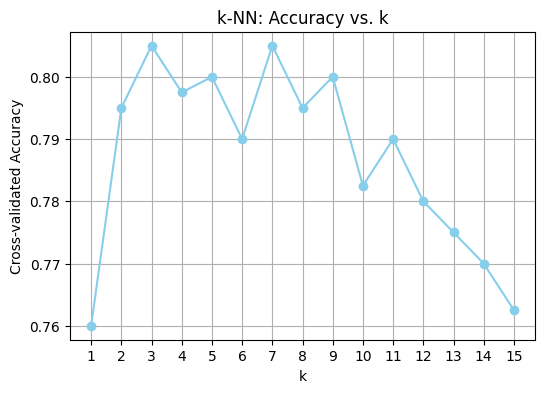

In [25]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_values = range(1, 16)
cv_scores = []

# Perform 5-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k: {optimal_k} with CV accuracy: {max(cv_scores):.4f}")

# Plot accuracy vs. k
plt.figure(figsize=(6,4))
plt.plot(k_values, cv_scores, marker='o', color='skyblue')
plt.xlabel('k')
plt.ylabel('Cross-validated Accuracy')
plt.title('k-NN: Accuracy vs. k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


**Q20.**  
Implement k-NN from scratch (using Euclidean distance). Compare its performance with scikit-learn’s version.

In [26]:
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# k-NN from scratch
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for x_test in X_test.to_numpy():
        # Compute distances to all training points
        distances = np.array([euclidean_distance(x_test, x_train) for x_train in X_train.to_numpy()])
        # Get indices of k nearest neighbors
        k_idx = distances.argsort()[:k]
        # Get their labels
        k_labels = y_train.to_numpy()[k_idx]
        # Majority vote
        most_common = Counter(k_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)

# Predict using scratch k-NN
y_pred_scratch = knn_predict(X_train, y_train, X_test, k=5)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"k-NN (from scratch) Accuracy: {accuracy_scratch:.4f}")

# Compare with scikit-learn k-NN
knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn k-NN Accuracy: {accuracy_sklearn:.4f}")


k-NN (from scratch) Accuracy: 0.7700
Scikit-learn k-NN Accuracy: 0.7800
